# Pricing a European portfolio option via Monte Carlo Method

Allemandri Mattia, Capparoni Davide, Dal Cin Alex

January $31^{th}$, 2023

_Implement the code for pricing a European call option on a portfolio of stocks._

As a preliminary step, it is necessary to import the packages needed to make the following code work. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Part 1

__Question__ 

Consider the following dynamics for the prices of 2 stocks: 
$$ dS^{1}_{t}= S^{1}_{t}rdt + S^{1}_{t} \sigma_1 (1 + \sin{4t})dW^{1}_{t}, $$
$$ dS^{2}_{t}= S^{2}_{t}rdt + S^{2}_{t} \sigma_2 (\rho dW^{1}_{t} + \sqrt{1 - \rho^2}dW^{2}_{t}), $$
where $W^1$ and $W^2$ are two independent Wiener processes, $r$ is the interest rate and $\rho \in [-1, 1]$ is the correlation coefficient. Use the Euler scheme to approximate the SDEs. 

__Answer__

In the following piece of code we set arbitrary values, chosen in order to simulate an empirical solution to the given stochastic differential equation (1). Then there is the implementation of the Euler-Maruyama scheme. 
It is useful recalling that for a SDE of the form
$$dX_t = a(t, X_t)dt + b(t, X_t)dW_t$$
the approximation of the solution given by the Euler-Maruyama scheme is
$$\tilde{X}_{n+1} = \tilde{X}_{n} + a(t, \tilde{X}_{n}) + b(t, \tilde{X}_{n}) \Delta W_n$$
where $\Delta W_n$ = $W_{n+1} - W_{n} \sim \mathcal{N}(0,\sqrt{dt})$. 
So, in the following code, before the computation of the Euler scheme, we find the increments of the Brownian motion computed as a sample of size N of random normals (2).
Then there is the  `for` loop that computes the approximated solutions from the following schemes (3): 
$$S^{1}_{t+1} = S^{1}_{t} + S^{1}_{t}rdt + S^{1}_{t}\sigma_{1} (1 + \sin(4t))\Delta W^{1}_{t}$$
$$S^{2}_{t+1} = S^{2}_{t} + S^{2}_{t}rdt + S^{2}_{t}\sigma_{2}(\rho \Delta W^{1}_{t} + \sqrt{1 - \rho^2}\Delta W^{1}_{t}).$$
Finally there is a plot of both trajectories (4).

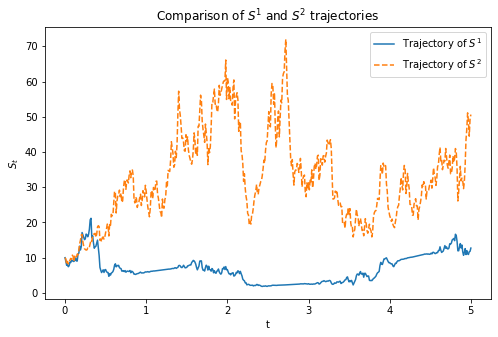

In [2]:
# (1) Set the value of the model's parameters
T = 5
N = 500
r = 0.5 
sigma_1 = 0.6
sigma_2 = 0.9
rho = 0.5
S1_0 = 10
S2_0 = 10
dt = T / N

# (2) Compute the increments of the two Brownian motions as random normals
dW1 = np.random.normal(scale = math.sqrt(dt), size = N)
dW2 = np.random.normal(scale = math.sqrt(dt), size = N)

# (3) Implement the Euler scheme
S1 = np.zeros(N + 1)
S2 = np.zeros(N + 1)
S1[0] = S1_0
S2[0] = S2_0

for i in range(N):
    S1[i+1] = S1[i] + r * S1[i] * dt + sigma_1 * S1[i] * (1 + math.sin(4 * i * dt)) * dW1[i]

for i in range(N):
    S2[i+1] = S2[i] + r * S2[i] * dt + sigma_2 * S2[i] * (rho * dW1[i] + math.sqrt(1 - rho ** 2) * dW2[i])
    
# (4) Plot
ts = np.linspace(0, T, N+1)
plt.figure(figsize = (8,5))
plt.plot(ts, S1, label =r"Trajectory of $S^1$")
plt.plot(ts, S2, linestyle='--', label = r"Trajectory of $S^2$")
plt.xlabel('t')
plt.ylabel(r'$S_t$')
plt.legend()
plt.title ("Comparison of $S^1$ and $S^2$ trajectories")
plt.show()

# Part 2 

__Question__

Compare the paths of $S^1$ computed with and without the term $(1 + sin(4t))$. Can you see any systematic difference? Hint: in your numerical solution, use the same trajectory of $W_{t}^{1}$ for solving $S^1$ with and without the term $(1 + sin(4t))$. For this comparison,  do not use classes. 

__Answer__

The first part of the solution follows the same steps of the First Part: there is the computation of the increments of the Brownian motion for both trajectories (1) and then the two paths, the one with the term $(1 + \sin(4t))$ (2) and the one without it(3), computed with the same solution scheme as above (Euler scheme). Again, as a final step there is a plot of both trajectories (4).

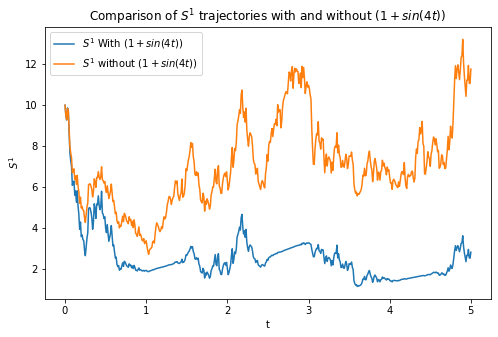

In [3]:
# (1) Compute the increments of Brownian motion
dW1 = np.random.normal(scale = math.sqrt(dt), size = N)

S1_with = np.zeros(N+1)
S1_without = np.zeros(N+1)
S1_with[0] = S1_0
S1_without[0] = S1_0

# (2) S1 path with (1+sin(4t))
for i in range(N):
    S1_with[i+1] = S1_with[i] + r * S1_with[i] * dt + sigma_1 * S1_with[i] * (1 + math.sin(4 * i * dt)) * dW1[i]

# (3) S1 path without (1+sin(4t))
for i in range(N):
    S1_without[i+1] = S1_without[i] + r * S1_without[i] * dt + sigma_1 * S1_without[i] * dW1[i]
    
# (4) Plot
ts = np.linspace(0, T, N+1)
plt.figure(figsize = (8,5))
plt.plot(ts, S1_with, label = r"$S^1$ With $(1 + sin(4t))$")
plt.plot(ts, S1_without, label = r"$S^1$ without $(1 + sin(4t)$)")
plt.xlabel('t')
plt.ylabel(r'$S^1$')
plt.legend()
plt.title (r"Comparison of $S^1$ trajectories with and without $(1+sin(4t))$")
plt.show()

About the difference between the two trajectories computed with and without the term $(1 + \sin(4t))$, it's possible to state the following considerations. The two paths have, more or less, the same trajectories, but the one without the term $(1 + \sin(4t))$ has, more or less, the same variability along all the trajectory. The trajectory with the term $(1 + \sin(4t))$ changes its variability according to the value of the term. This term oscillates between 0 and 2, when it is close to 0 we observe a small variability and when it grows there is a bigger variability. Despite that, the behaviour of both trajectories is more or less the same and it depends on $dW_1$.

# Part 3 

__Question__

Implement class Market with the following funtionalities:
- generate a trajectory process of those two stocks,
- efficiently generate multiple values at the terminal time T,
- print out the parameters of financial assets on the market (two stocks and the bond).

__Answer__

In the following piece of code we find the implementation of the class `Market`, that has all the requested functionalities. The meaning of the input parameters and of the methods can be found in the comments of the code. 

In [4]:
class Market:
    """
    This class has three methods: 
    - trajectory: it generates a trajectory process using Euler scheme with N timesteps
    - solution_bulk: it generates m values a time T
    - financial_data: it computes the prices of the stocks and the bond on the market
    
    The parameters this class needs are: 
    - S1_0: initial value of S1 path
    - S2_0: initial value of S2 path
    - r: the interest rate
    - sigma_1: volatility of S1
    - sigma_2: volatility of S2
    - rho: the correlation coefficient between S1 and S2 
    - T: final time (with default value 1)
    - N: number of timesteps (with default value 10)
    """
            
    def __init__(self, S1_0, S2_0, r, sigma_1, sigma_2, rho, T = 1, N = 10):        
        self.S1_0 = S1_0
        self.S2_0 = S2_0
        self.r = r
        self.sigma_1 = sigma_1
        self.sigma_2 = sigma_2
        self.rho = rho
        self.T = T
        self.N = N    
        #the following command checks that rho is between 0 and 1
        if rho < -1 or rho > 1: 
            raise Exception('Parameter rho must live between -1 and 1.')
    
    def trajectory(self):
        # It follows the same steps of Part 1
        dt = self.T/self.N
        
        # Compute increments of Brownian motion
        dW1= np.random.normal(scale = math.sqrt(dt), size = self.N)
        dW2= np.random.normal(scale = math.sqrt(dt), size = self.N)
        
        # Euler scheme
        S1 = np.zeros(self.N+1)
        S2 = np.zeros(self.N+1)
        S1[0] = self.S1_0
        S2[0] = self.S2_0
        for i in range(self.N):
            S1[i+1]=S1[i]+ self.r * S1[i] * dt + self.sigma_1 * S1[i] * (1+math.sin(4*i*dt)) * dW1[i]
            S2[i+1] = S2[i] + self.r * S2[i] * dt + self.sigma_2 * S2[i] * (self.rho*dW1[i]+math.sqrt(1-self.rho**2) * dW2[i])            

        return np.array((np.linspace(0, self.T, self.N+1),S1,S2))

    def solution_bulk(self, M):
        # Compute the timesteps
        dt = self.T/self.N
        # Generate the arrays that will contain the values at time T
        S1 = np.full(M, self.S1_0)
        S2 = np.full(M, self.S2_0)
        for i in range(self.N):
            # Compute increments of Brownian motion
            dW1 = np.random.normal(scale = math.sqrt(dt), size = M)
            # Compute the final value at time T of S1
            S1 = S1 + self.r * S1 * dt + self.sigma_1 * S1 * (1+math.sin(4*i*dt)) * dW1
            # Compute increments of Brownian motion
            dW2 = np.random.normal(scale = math.sqrt(dt), size = M)
            # Compute the final value at time T of S2
            S2 = S2 + self.r * S2 * dt + self.sigma_2 * S2 * (self.rho*dW1+math.sqrt(1-self.rho**2) * dW2)
        
        return S1, S2

    def financial_data(self):
        # Generate the arrays that will contain the time points
        times = np.zeros(self.N)
        # Compute the timesteps
        dt = self.T / self.N
        # Genetate the time (t) values
        for i in range(self.N):
            times[i] = i * dt
        #Generate the values of the bond
        bonds = np.zeros(self.N)
        for i in range(self.N):
            bonds[i] = (1 + self.r)**times[i]
        # Compute increments of Brownian motion
        dW1= np.random.normal(scale = math.sqrt(dt), size = self.N)
        dW2= np.random.normal(scale = math.sqrt(dt), size = self.N)
        # Euler scheme
        S1 = np.zeros(self.N+1)
        S2 = np.zeros(self.N+1)
        S1[0] = self.S1_0
        S2[0] = self.S2_0
        for i in range(self.N):
            S1[i+1]=S1[i]+ self.r * S1[i] * dt + self.sigma_1 * S1[i] * (1+math.sin(4*i*dt)) * dW1[i]
            S2[i+1] = S2[i] + self.r * S2[i] * dt + self.sigma_2 * S2[i] * (self.rho*dW1[i]+math.sqrt(1-self.rho**2) * dW2[i])
        
            
        return bonds, S1, S2

Here is the class `Market` put into action with a numerical example. First of all there is the setting of the model's parameters (1), secondly the generation of the object `market` using the class `Market` (2). Finally there are the tests of the three methods of the class:
- the command that generates the  trajectories of $S^1$ and $S^2$ (3); 
- the command that generates $M$ solution at time $T$ for both $S^1$ and $S^2$ (4);
- the command that generates the trajectories of both $S^1$ and $S^2$, plus the trajectory of the bond (5). 

In [5]:
# (1) Set the value of the model's parameters
S1_0=10
S2_0=8.5
r=0.05
sigma_1 = 0.3
sigma_2 = 0.5
rho=0.5
T=1
N=10
M = 40

# (2) Generate the object market using the class Market
market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)

# (3) Generate the trajectories of S1 and S2
print("The trajectories of S1 and S2 are:", "\n", market.trajectory()) 

# (4) Generate 10 solution at time T
print("The", M, "solutions at time T =", T, "are:", "\n", market.solution_bulk(M))

# (5) Print out the values of the two stocks
print("The values of the two stocks and the bond are:", "\n", market.financial_data())

The trajectories of S1 and S2 are: 
 [[ 0.          0.1         0.2         0.3         0.4         0.5
   0.6         0.7         0.8         0.9         1.        ]
 [10.         10.45361944 11.34467245 10.90167513  9.26536305 10.43225289
   9.23423896  9.76175769  8.54680316  7.29851069  7.34679233]
 [ 8.5         8.84679368  9.01223392 10.51537869 11.01994137 12.4340741
  12.4402165  11.5316868   9.85961966 11.32077243 12.39080388]]
The 40 solutions at time T = 1 are: 
 (array([ 5.78332673, 13.39372638, 17.19669807, 10.34432181, 13.17391557,
       25.76547159,  9.20883353, 10.94166249,  9.61073918, 11.24564273,
        8.46549748,  6.31488096,  7.59969705,  7.25408351,  6.06503162,
       10.71676142, 10.6117013 , 13.1048095 , 10.82320809, 10.72105931,
        7.16237492,  5.71761211,  9.11585982, 10.98029641, 13.9055029 ,
        4.60795754, 12.07523099, 23.50073168,  6.24128755,  6.18227563,
       12.65503925,  5.32840093, 12.80366204,  9.37334352, 14.92788305,
        7.192538

# Part 4

__Question__

Implement class PortfolioOption which can price via plain Monte Carlo simulation
the call option with payoff $(\alpha S^{1}_{T} + (1 - \alpha) S^{2}_{T} - K)^{+}$ with $\alpha \in [0, 1]$. In your implementation use the class Market.

__Answer__

The class `PortfolioOption` implemented in the following piece of code computes the price and the variance using Monte Carlo Method.   
The method `MC_price` considers $M$ prices at time $T$ and computes the price of the call option as defined above.  Finally it computes and prints the mean of these prices.    
The method `MC_variance` computes and prints the variance of the price with 1 degree of freedom.    
Both methods print one number each. 

In [6]:
class PortfolioOption:
    """
    This class has two methods: 
    - MC_price: it prices the option via Monte Carlo method
    - MC_var: it computes the variance of the price computed
    
    The parameters needed are: 
    - ST: the prices at time T
    - alpha: the weight of S1
    - K: the strike price
    """
    
    def __init__(self, ST, alpha, K):
        # The following command checks that alpha is between 0 and 1
        if alpha < 0 or alpha > 1: 
            raise Exception('Parameter alpha must live between 0 and 1.')
        # Generate the vector that will contains the payoffs
        self.payoffs = np.zeros(len(ST[0]))
        # Generate the payoffs of the call option as described in the question:
        self.payoffs = np.maximum((alpha * ST[0] + (1 - alpha)* ST[1] - K), 0)
        
    def MC_price(self):
        # Return the mean of the payoffs of the call option
        return self.payoffs.mean()
    
    def MC_variance(self):
        # Return the variance of the payoffs of the call option
        return self.payoffs.var(ddof = 1)

Again a numerical example to put the class PortofolioOption into action. 
In the following piece of code there is the setting of the new parameters (1), then the definition of the objects `market` and `portfolio` using the classes generated above (2) and finally the computation of the Monte Carlo price and of the variance (3).

In [7]:
# (1) Set the new model's parameters
M = 1000
alpha = 0.5
K = 10

# (2) Generate the objects market and portfolio
market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
portfolio = PortfolioOption(market.solution_bulk(M), alpha, K)

# (3) Compute the price and the variance and print out the results
price = portfolio.MC_price()
variance = portfolio.MC_variance()
print("The Monte Carlo price is", price, "and the variance is", variance)

The Monte Carlo price is 1.4918983113557993 and the variance is 7.46625480455658


# Part 5

__Question__

Compute the price and confidence intervals for different number of Monte Carlo paths and for different number of steps in the numerical scheme.
- How does the price depend on the number of steps of the Euler scheme?
- How does the accuracy of the Monte Carlo approximations depend on the number of Monte Carlo paths (iterations)? Does the accuracy depend on $\alpha$, $\rho$ and $\sigma_1$, $\sigma_2$?

__Answer__

Here is the price of the call option computed for multiple values of $N$. So there is an array with multiple values of $N$ (1),  an array for the prices (2) and the computation of all prices (3) as done above. In the last part of the code there is a plot showing the results (4).

What is written is a code that computes the trajectories, then it plots them, of the price as a function of $N$, and it is done for multiple values of this parameter. This can show how the price responds to the change of the steps in the Euler scheme. 

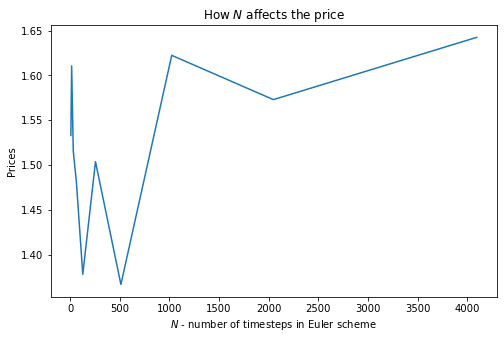

In [8]:
# (1) Generate an array with multiple values for N
Ns = np.power(2, np.arange(3, 13))

# (2) Generate the arrays that will contain the prices
prices =list()

# (3) Compute the prices for all Ns
for N in Ns:
    market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
    portfolio = PortfolioOption(market.solution_bulk(M), alpha, K)
    prices.append(portfolio.MC_price())
    #print(N)
    #print(portfolio.MC_price())

# (4) Plot
plt.figure(figsize = (8,5))
plt.plot(Ns, prices, label = "Prices with different N")
plt.xlabel(r'$N$ - number of timesteps in Euler scheme')
plt.ylabel('Prices')
plt.title ("How $N$ affects the price")
plt.show()

In order to have a better idea of the accuracy of Monte Carlo approximation it's useful to consider confidence intervals (for simplicity evaluated at the $95\%$ level). So what is done in the following piece of code is a class, called `CI`, that computes the confidence interval for a given price and a given variance. The class has four methods: the first two compute, respectively, the left bound and the right bound (these methods might be very useful to print a plot with many confidence intervals). Then the third method computes the length of the confidence interval and finally the last one returns the complete confidence interval. 

In [9]:
class CI:
    """
    This class computes the bounds of the confidence interval given the price. 
    It has three methods: 
    - conf_int_left: it computes the left bound of the CI
    - conf_int_right: it computes the right bound of the CI
    - confidence_interval: it returns both bounds of the CI
    
    The input needed for the class are: 
    - price: the price computed via Monte Carlo Method
    - var: the variance of the price computed via MC Method
    - M: the number of iterations of the MC Method
    """
    
    def __init__(self, price, var, M):
        err = math.sqrt(var / M)
        self.left = price - 1.96 * err
        self.right = price + 1.96 * err
        
    def conf_int_left(self): 
        return self.left
    
    def conf_int_right(self):
        return self.right
    
    def conf_int_length(self):
        return self.right - self.left
    
    def confidence_interval(self):
        return (self.left, self.right)

Here is an example to check that the class `CI` works well.

In [10]:
# Reminder: the objects price and variance are computed in the example of Part 4
# Define the object conf_int
conf_int = CI(price, variance, M)

# Compute the left bound of che confidence interval
left = conf_int.conf_int_left()

# Compute the right bound of the confidence interval
right = conf_int.conf_int_right()

# Compute the complete confidence interval
ci = conf_int.confidence_interval()

#Compute the length of the confidence interval
length = conf_int.conf_int_length()

# Print out the results
print("The left bound of the confidence interval is", left, "and the right bound is", right, "\n", 
     "So the complete confidence interval is", ci, "\n", "Finally the length of the confidence interval is", length)

The left bound of the confidence interval is 1.322539625552016 and the right bound is 1.6612569971595825 
 So the complete confidence interval is (1.322539625552016, 1.6612569971595825) 
 Finally the length of the confidence interval is 0.33871737160756643


Now some considerations about the accuracy of Monte Carlo approximation based on plots of confidence intervals.
What is done, more precisely, is the computation of many confidence intervals for each required parameter. Then, we consider the legth of the confidence intervals as a measure of the accuracy of the approximation. It is clear that when the length is large the accuracy is worse and viceversa. More precisely, what is done is computing this length for many values of the parameter considered, then plotting these. In this way there is a measure that consider the accuracy of the approximation as a function os the parameter considered. 

What is comportant to remind is that the accuracy is better when the measure given is low. If one wants a measure that grows as the accuracy gets better has to construct another measure (e.g. if $x$ is the lenght of the confidence intervals, a measure function $\mu$ of this kind can be $\mu = \frac{1}{x}$). 

The first parameter checked is $M$. In the following piece of code there is an array that contains multiple value for the parameter (1), then the generation of two array that will contain the values of the length of the confidence intervals (2) and finally the computation of the length using the class `CI` (3). Finally the plot (4).

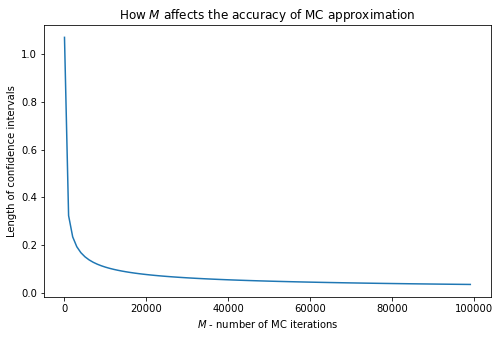

In [11]:
N=100
# (1) Generate an array with multiple values for M
Ms = np.arange(100, 100001, 1000)

# (2) Generate the list that will contain the measures of the accuracy
A = list()

# (3) Compute the bounds of the confidence intervals for all M's
for M in Ms: 
    conf_int = CI(price, variance, M)
    A.append(conf_int.conf_int_length())

# (4) Plot
plt.figure(figsize=(8, 5))
plt.title(r"How $M$ affects the accuracy of MC approximation")
plt.plot(Ms, A)
#plt.plot(Ms, R, label = "Right bounds of confidence intervals")
plt.xlabel(r'$M$ - number of MC iterations')
plt.ylabel('Length of confidence intervals')
plt.show()

It is very clear that when $M$ becomes bigger, the confidence interval becomes smaller. This means that the accuracy of the Monte Carlo approximantion gets better. From now we set $M = 50000$ because in this point the length of the confidence interval is more or less $0.50$, so very small. Obviusly if one chose a bigger value for $M$ the accuracy would get better, but the program probably loses his effciency. 

The following piece of code follows the same reasoning as before, but for multiple values of $\alpha$. First of all there is an array with the values of $\alpha$ (1), then the array for the values of the length of the confidence intervals (2). As a third step there is the computation of the confidence intervals legth (3) and finally a plot (4). 

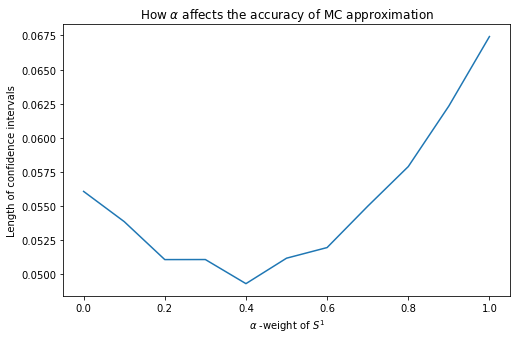

In [12]:
M= 50000

# (1) Generate the array with multiple values for alpha
alphas = np.arange(0, 1.01, 0.1)

# (2) Generate the arrays that will contain the bounds of the confidence intervals
A = list()

# (3) Compute the bounds of the confidence intervals for all alphas
for alpha in alphas:
    market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
    portfolio = PortfolioOption(market.solution_bulk(M), alpha, K)
    price = portfolio.MC_price()
    variance = portfolio.MC_variance()
    conf_int = CI(price, variance, M)
    A.append(conf_int.conf_int_length())

# (4) Plot
plt.figure(figsize=(8, 5))
plt.title(r"How $\alpha$ affects the accuracy of MC approximation")
plt.plot(alphas, A)
plt.xlabel(r'$\alpha$ -weight of $S^1$')
plt.ylabel('Length of confidence intervals')
plt.show()

What this analysis shows very well is that, fixed $M = 5000$, there is a minimum point for the length around $\alpha \approx 0.4$. So starting from the next step we set $\alpha = 0.4$ in order to get a better analysis.

Again, the same work for the correlation coefficient $\rho$. The explanation of all the steps is omitted for simplicity, since they are the same as in the previous points. 

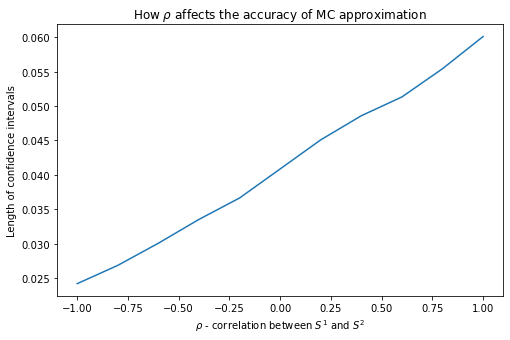

In [13]:
alpha = 0.4

# (1) Generate an array with multiple values for rho
rhos = np.arange(-1, 1.01, 0.2)

# (2) Generate the arrays that will contain the bounds of the confidence intervals
A = list()
# (3) Compute the bounds of the confidence intervals for all rhos
for rho in rhos:
    # Generate the object market and portfolio as done above
    market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
    portfolio = PortfolioOption(market.solution_bulk(M), alpha, K)
    # Compute the prices with the Monte Carlo simulation of example2
    price= portfolio.MC_price()
    variance = portfolio.MC_variance()
    # Compute the bounds of confidence intervals
    conf_int = CI(price, variance, M)
    A.append(conf_int.conf_int_length())
    
# (4) Plot
plt.figure(figsize=(8, 5))
plt.title(r"How $\rho$ affects the accuracy of MC approximation")
plt.plot(rhos, A)
plt.xlabel(r'$\rho$ - correlation between $S^1$ and $S^2$')
plt.ylabel('Length of confidence intervals')
plt.show()

From the plot it seems that the accuracy has a monotone behaviour with respect to the change of $\rho$ and more precisely, when there is a negative correlation between $S^1$ and $S^2$ the accuracy assumes its better value. So we set a very small value for the parameter $\rho$.

In the following piece of code there is the same analysis for $\sigma_1$ and $\sigma_2$. Again, the explanation of all the steps is omitted.

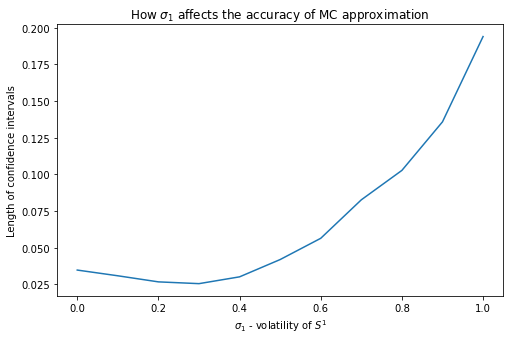

In [14]:
rho = -0.9

# (1) Generate an array with multiple values for sigma_1
sigma_1s = np.arange(0, 1.001, 0.1)
# (2) Generate the arraies that will contain the bounds of the confidence intervals
A = list()

# (3) Compute the bounds of the confidence intervals for all sigma_1s
for sigma_1 in sigma_1s:
    # Generate the object market and portfolio as done above
    market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
    portfolio = PortfolioOption(market.solution_bulk(M), alpha, K)
    # Compute the prices with the Monte Carlo simulation of example2
    price= portfolio.MC_price()
    variance = portfolio.MC_variance()
    # Compute the bounds of confidence intervals
    conf_int = CI(price, variance, M)
    A.append(conf_int.conf_int_length())
    
# (4) Plot
plt.figure(figsize=(8, 5))
plt.title(r"How $\sigma_1$ affects the accuracy of MC approximation")
plt.plot(sigma_1s, A)
plt.xlabel(r'$\sigma_1$ - volatility of $S^1$')
plt.ylabel('Length of confidence intervals')
plt.show()

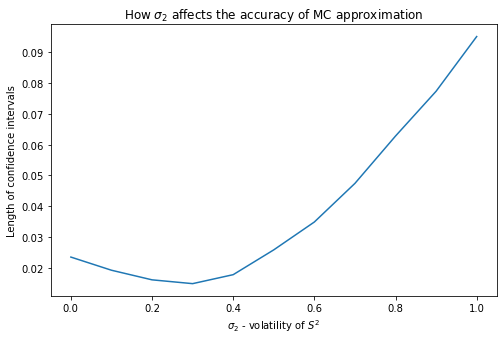

In [15]:
sigma_1 = 0.3
# (1) Generating the array with multiple values for sigma_2
sigma_2s = np.arange(0, 1.001, 0.1)
# (2) Generate the arrays that will contain the bounds of the confidence intervals
A = list()

# (3) Compute the bounds of the confidence intervals for all sigma_2s
for sigma_2 in sigma_2s:
    # Generate the object market and portfolio as done above
    market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
    portfolio = PortfolioOption(market.solution_bulk(M), alpha, K)
    # Compute the prices with the Monte Carlo simulation of example2
    price= portfolio.MC_price()
    variance = portfolio.MC_variance()
    # Compute the bounds of confidence intervals
    conf_int = CI(price, variance, M)
    A.append(conf_int.conf_int_length())
    
# (4) Plot
plt.figure(figsize=(8, 5))
plt.title("How $\sigma_2$ affects the accuracy of MC approximation")
plt.plot(sigma_2s, A)
plt.xlabel('$\sigma_2$ - volatility of $S^2$')
plt.ylabel('Length of confidence intervals')
plt.show()

Also $\sigma_1$ and $\sigma_2$ have a minimum in their graph and it seems that the minimun for $\sigma_2$ is smaller than the minimum for $\sigma_1$. After the minimum, the accuracy gets really worse in both $\sigma_1$ and $\sigma_2$.

# Part 6

__Question__

Analyse the sensitivity of the price to $\rho$ and $\alpha$ for the following parameters:
$$ S_{0}^{1} = S_{0}^{2} = 100, r = 0.05, \sigma_1 = 0.3, \sigma_2 = 0.2, T = 0.5, K = 100. $$
Using the results of the previous step, suggest what number of Euler scheme steps
and Monte Carlo paths are needed for a meaningful analysis.

__Answer__

In order to analyse the sensitivity of $\rho$ and $\alpha$, the first step done is setting the new parameters (1), as asked in the question.
We decided $M = 1000$ becouse of the results of the previous question (compued with different parameters). The reason why we have made this decision is because around 1000 there is a big change of the slope. An additional increment of M gives a non-significant improvement in the accuracy of the Monte Carlo approximation.   

In [16]:
# (1) Set the new parameters
S1_0 = 100
S2_0 = 100
r = 0.05
sigma_1 = 0.3
sigma_2 = 0.2
T = 0.5
N = 10
M = 50000
market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
traj = market.solution_bulk(M)
K = 100

After that there is the analysis of the price depending on $\alpha$. In the following pieces of code the same computation is repeated for $N = 10$ and then for $N = 100$. The computation done is about the confidence intervals of the price and it seems that there is not a significant change in the accuracy of the Monte Carlo approximation when $N$ becomes bigger, so it is suggested $N = 10$.

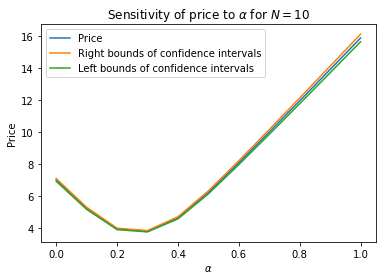

In [17]:
# Generate multiple values for alpha
alphas = np.arange(0, 1.001, 0.1)

# Generate an empty list that will contain the prices
P = list()
# Generate an empty list that will contain the left bounds of the confidence intervals
L = list()
# Generate an empty list that will contain the right bounds of the confidence intervals
R = list()

# Compute the confidence intervals for different alphas
for alpha in alphas:
    portfolio = PortfolioOption(traj, alpha, K)
    p = portfolio.MC_price()
    v = portfolio.MC_variance()
    conf_int = CI(p, v,  M)
    P.append(p)
    L.append(conf_int.conf_int_left())
    R.append(conf_int.conf_int_right())
    
# Plot the confidence intervals
plt.title(r"Sensitivity of price to $\alpha$ for $N = 10$")
plt.plot(alphas, P, label = 'Price')
plt.plot(alphas, R, label = 'Right bounds of confidence intervals')
plt.plot(alphas, L, label = 'Left bounds of confidence intervals')
plt.xlabel(r'$\alpha$') 
plt.ylabel('Price')
plt.legend()
plt.show()

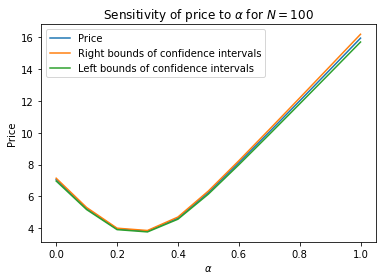

In [18]:
# Set N = 100 and compute the new trajectory
N = 100
market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
traj = market.solution_bulk(M)

# Generate an empty list that will contain the prices
P = list()
# Generate an empty list that will contain the left bounds of the confidence intervals
L = list()
# Generate an empty list that will contain the right bounds of the confidence intervals
R = list()

# Compute the confidence intervals for different alphas
for alpha in alphas:
    portfolio = PortfolioOption(traj, alpha, K)
    p = portfolio.MC_price()
    v = portfolio.MC_variance()
    conf_int = CI(p, v,  M)
    P.append(p)
    L.append(conf_int.conf_int_left())
    R.append(conf_int.conf_int_right())
    
# Plot the confidence intervals
plt.title(r"Sensitivity of price to $\alpha$ for $N = 100$")
plt.plot(alphas, P, label = 'Price')
plt.plot(alphas, R, label = 'Right bounds of confidence intervals')
plt.plot(alphas, L, label = 'Left bounds of confidence intervals')
plt.xlabel(r'$\alpha$') 
plt.ylabel('Price')
plt.legend()
plt.show()

Given what there is above, we set $N = 10$ and $M = 50000$ and we do the same analysis for $\rho$. 

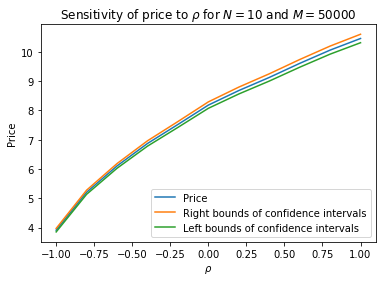

In [19]:
# Set N = 10
N = 10
M = 50000
alpha = 0.4

# Array with multiple values of rho
rhos = np.arange(-1, 1.1, 0.2)

# Generate an empty list that will contain the prices
P = list()
# Generate an empty list that will contain the left bounds of the confidence intervals
L = list()
# Generate an empty list that will contain the right bounds of the confidence intervals
R = list()

# Computing the confidence intervals of the price with rho changing
for rho in rhos:
    market = Market(S1_0, S2_0, r, sigma_1, sigma_2, rho, T, N)
    traj = market.solution_bulk(M)
    portfolio = PortfolioOption(traj, alpha, K)
    #compute the prices with the Monte Carlo simulation of example2
    p = portfolio.MC_price()
    v = portfolio.MC_variance()
    conf_int = CI(p, v, M)
    P.append(p)
    L.append(conf_int.conf_int_left())
    R.append(conf_int.conf_int_right())
    
# Plot the confidence intervals
plt.title(r"Sensitivity of price to $\rho$ for $N = 10$ and $M= 50000$")
plt.plot(rhos, P, label = 'Price')
plt.plot(rhos, R, label = 'Right bounds of confidence intervals')
plt.plot(rhos, L, label = 'Left bounds of confidence intervals')
plt.xlabel(r'$\rho$') 
plt.ylabel('Price')
plt.legend()
plt.show()